# <font color='red'> BUAN 6341.001 Applied Machine Learning - Project 1
    
## Ankit Raina
## Sanjana Patil



### Project description:
- Please read the Data Set Information section to learn about this dataset. 
- Data description is also provided for thi dataset.
- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

### Classification task:
- Decide aboute a good evaluation strategy and justify your choice.
- Find best parameters for following classification models: KNN classifcation, Logistic Regression, Linear Supprt Vector Machine, Kerenilzed Support Vector Machine, Decision Tree. 
- Which model gives the best results?

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged. 

### Questions regarding project:
- Post your queries related to project on discussion board on e-learning. There is high possibility that your classmate has also faced the same problem and knows the solution. This is an effort to encourage collaborative learning and also making all the information available to everyone. We will also answer queries there. We will not be answering any project related queries through mail.

---
### Data Set Information:
This dataset is taken from a research explained here. 

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

There are two csv files to present data. Please merge these two datasets into one dataframe. All the steps should be done in Python. Please don't make any changes in csv files. Consider ``Audit_Risk`` as target columns for regression tasks, and ``Risk`` as the target column for classification tasks. 

### Attribute Information:
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interview with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.


### Relevant Papers:
Hooda, Nishtha, Seema Bawa, and Prashant Singh Rana. 'Fraudulent Firm Classification: A Case Study of an External Audit.' Applied Artificial Intelligence 32.1 (2018): 48-64.

### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the data sets

In [2]:
audit_risk_data = pd.read_csv('audit_risk.csv')
trial_data = pd.read_csv('trial.csv')

### Merging the two datasets

In [3]:
# Not considering duplicate columns in trial_data when merging
common_columns = audit_risk_data.columns.intersection(trial_data.columns).tolist()
merged_audit_risk_data = pd.merge(audit_risk_data, trial_data, how = 'inner', left_on=common_columns, right_on=common_columns)

In [4]:
merged_audit_risk_data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,1.7148,1,6,2,2,2,2,0,2,2
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.5108,0,2,2,2,2,2,0,2,2
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.3096,0,2,2,2,2,2,0,2,2
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,3.5060,1,2,6,6,6,2,0,2,2
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2832,0,2,2,2,2,2,0,2,2


### Checking if there is any null value

In [5]:
merged_audit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 35 columns):
Sector_score      629 non-null float64
LOCATION_ID       629 non-null object
PARA_A            629 non-null float64
Score_A           629 non-null float64
Risk_A            629 non-null float64
PARA_B            629 non-null float64
Score_B           629 non-null float64
Risk_B            629 non-null float64
TOTAL             629 non-null float64
numbers           629 non-null float64
Score_B.1         629 non-null float64
Risk_C            629 non-null float64
Money_Value       628 non-null float64
Score_MV          629 non-null float64
Risk_D            629 non-null float64
District_Loss     629 non-null int64
PROB              629 non-null float64
RiSk_E            629 non-null float64
History           629 non-null int64
Prob              629 non-null float64
Risk_F            629 non-null float64
Score             629 non-null float64
Inherent_Risk     629 non-null float64
CON

##### After performing the merge on common columns, we see that only 629 observations out of the 776 observations could be matched in both the datasets.
##### We can see that there is one observation for which Money_Value is null, which we'll mark as NaN

##### As we can see that Location_ID is the only categorical variable (object), which is coded as an integer, but there is probability that some of the values may not be numeric, we'll check for such values and mark them as NaN

In [16]:
merged_audit_risk_data = merged_audit_risk_data.replace(r'[^\d.]+',np.nan,regex=True)
merged_audit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 628
Data columns (total 35 columns):
Sector_score      625 non-null float64
LOCATION_ID       625 non-null object
PARA_A            625 non-null float64
Score_A           625 non-null float64
Risk_A            625 non-null float64
PARA_B            625 non-null float64
Score_B           625 non-null float64
Risk_B            625 non-null float64
TOTAL             625 non-null float64
numbers           625 non-null float64
Score_B.1         625 non-null float64
Risk_C            625 non-null float64
Money_Value       625 non-null float64
Score_MV          625 non-null float64
Risk_D            625 non-null float64
District_Loss     625 non-null int64
PROB              625 non-null float64
RiSk_E            625 non-null float64
History           625 non-null int64
Prob              625 non-null float64
Risk_F            625 non-null float64
Score             625 non-null float64
Inherent_Risk     625 non-null float64
CON

In [17]:
merged_audit_risk_data.isna().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value       False
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
SCORE_A           False
SCORE_B           False
Marks             False
MONEY_Marks       False
District          False
Loss              False
LOSS_SCORE        False
History_score     False
dtype: bool

In [18]:
merged_audit_risk_data = merged_audit_risk_data.dropna()

In [19]:
merged_audit_risk_data.info()
merged_audit_risk_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 628
Data columns (total 35 columns):
Sector_score      625 non-null float64
LOCATION_ID       625 non-null object
PARA_A            625 non-null float64
Score_A           625 non-null float64
Risk_A            625 non-null float64
PARA_B            625 non-null float64
Score_B           625 non-null float64
Risk_B            625 non-null float64
TOTAL             625 non-null float64
numbers           625 non-null float64
Score_B.1         625 non-null float64
Risk_C            625 non-null float64
Money_Value       625 non-null float64
Score_MV          625 non-null float64
Risk_D            625 non-null float64
District_Loss     625 non-null int64
PROB              625 non-null float64
RiSk_E            625 non-null float64
History           625 non-null int64
Prob              625 non-null float64
Risk_F            625 non-null float64
Score             625 non-null float64
Inherent_Risk     625 non-null float64
CON

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,...,625.000000,625.000000,625.000000,625.000000,625.00000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,21.458752,2.638337,0.339200,1.490003,13.189666,0.320640,7.767216,15.788643,5.082400,0.228800,...,8.747667,0.491200,3.392000,3.206400,2.28800,3.110400,2.560000,0.033600,2.070400,2.204800
std,24.583572,6.295894,0.180853,3.805486,55.547565,0.176794,33.354451,56.883767,0.291455,0.088085,...,42.943459,0.500323,1.808527,1.767937,0.88085,1.710349,1.330124,0.197315,0.402123,0.748701
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.280000,0.000000,2.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.720000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.210000,5.000000,0.200000,...,0.299200,0.000000,2.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.650000,0.200000,0.130000,0.430000,0.200000,0.086000,1.050000,5.000000,0.200000,...,0.444800,0.000000,2.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.920000,0.600000,1.752000,6.720000,0.600000,3.448000,11.120000,5.000000,0.200000,...,4.971600,1.000000,6.000000,6.000000,2.00000,4.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,961.514400,1.000000,6.000000,6.000000,6.00000,6.000000,6.000000,2.000000,6.000000,6.000000


## Regression

### Feature Selection

c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


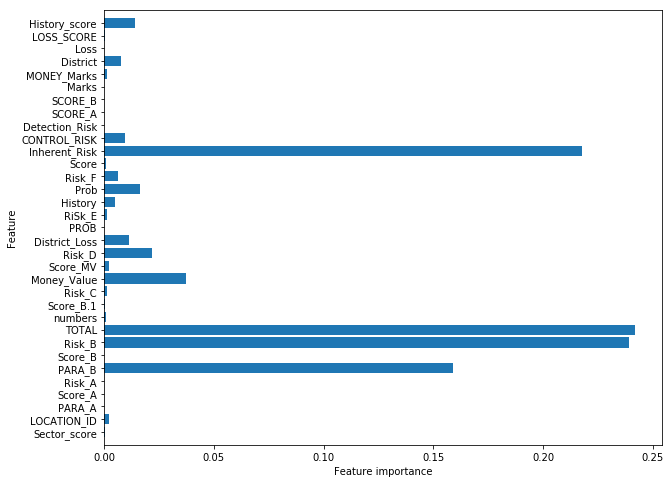

In [20]:
X = merged_audit_risk_data.loc[:, ~merged_audit_risk_data.columns.isin(['Audit_Risk', 'Risk'])]
y = merged_audit_risk_data.loc[:, merged_audit_risk_data.columns.isin(['Audit_Risk', 'Risk'])]

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(random_state=0)
model.fit(X, y['Audit_Risk'])

%matplotlib inline
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(model)

### Checking for correlation

corr_matrix = merged_audit_risk_data.corr().abs()
high_corr_var = np.where(corr_matrix>0.9)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

Now, from the above features with the most importance, we had computed  
1. Total, PARA_B and Risk_B are more than 90% correlated
2. Inherent_Risk, Risk_D and Money_Value are more than 90% correlated
3. Prob and History_Score are more than 90% correlated

We therefore,
Drop PARA_B and Risk_B in favor of Total
Drop Risk_D and Money_Value in favor of Inherent_Risk
Drop History_Score and Money_Value in favor of Prob

Final Features to be used for regression are as under:
TOTAL, Inherent_Risk, Prob, District_Loss, Score, CONTROL_RISK, Score_MV

features_for_regression = ['TOTAL','Inherent_Risk', 'Prob', 'Score', 'CONTROL_RISK', 'District_Loss', 'Score_MV']
X = X.loc[:, features_for_regression]

### Outlier Detection

from pandas.plotting import scatter_matrix
scatter_matrix(X, figsize = (15,15), c = y['Risk'], alpha = 0.8, marker = 'O')

green_diamond = dict(markerfacecolor='g', marker='D')

fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(111)
ax1.boxplot(X.values, flierprops=green_diamond)

from scipy import stats
data_outliers_removed = merged_audit_risk_data[(np.abs(stats.zscore(merged_audit_risk_data.loc[:, features_for_regression])) < 3).all(axis=1)]

X = data_outliers_removed.loc[:, features_for_regression]
y = data_outliers_removed.loc[:, ['Audit_Risk', 'Risk']]

### Splitting the data into training-validation and test data sets 

In [21]:
from sklearn.model_selection import train_test_split

X_trainval_org, X_test_org, y_trainval, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

# We have two output variables Audit_Risk and Risk
# Assessing Audit_Risk is a regression problem whereas assessing Risk is a binary classification problem
y_reg_trainval = y_trainval['Audit_Risk']
y_reg_test = y_test['Audit_Risk']

y_cls_trainval = y_trainval['Risk'].astype(np.int64)
y_cls_test = y_test['Risk'].astype(np.int64)

### Scaling the training-validation and test data sets using Standard Scaler

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_trainval = scaler.fit_transform(X_trainval_org)
X_test = scaler.fit_transform(X_test_org)

c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X,

### Stratified 5-folds Cross-Validation 
We will be using Stratified 5-folds Cross-Validation such that each of our test fold will have 20 % of the data 

In [23]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

### Evaluation Strategy
##### For regression, we will assess the model based on how well it is able to explain the variance in the output variable from the input set, therefore, we will use R2 score for this, wherein the model with the best R2 score will be the best.
##### Also, the difference between the actual value and the predicted value of the output variable should be minimum, therefore we will use MSE (Minimum Squared Error), wherein the model with the least MSE or the highest Negative MSE will be the best. 

### K Nearest Neigbors Regressor

We will first have to ascertain what should be the ideal value of k, such that we get the most accuracy.
We will determine the mean Mean Squared Error (MSE) of the 5-fold cross-validation scheme for different values of k.
The ideal k would be the one which gives the least mean MSE of the 5-fold cross-validation scheme.

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'n_neighbors': range(1, 20)}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit='R2', return_train_score=True,
       scoring={'R2': 'r2', 'MSE': 'neg_mean_squared_error'}, verbose=0)

In [18]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'n_neighbors': 1}
Best Mean Train MSE: 0.0000
Best Mean Train R2: 1.0000
Best Mean Validation MSE: -1727.7694
Best Mean Validation R2: 0.6434


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,...,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_train_MSE,split1_train_MSE,split2_train_MSE,split3_train_MSE,split4_train_MSE,mean_train_MSE,std_train_MSE
0,0.002091,0.000704,0.007601,0.001193,1,{'n_neighbors': 1},0.848760,0.689930,0.888109,0.103626,...,-1727.769416,3260.494835,1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
1,0.004025,0.003363,0.009236,0.002724,2,{'n_neighbors': 2},0.868549,0.537801,0.821947,0.076439,...,-1799.279282,3350.599568,4,-541.115345,-552.827578,-546.660975,-30.329697,-527.084374,-439.603594,204.813866
2,0.001671,0.000610,0.006490,0.000748,3,{'n_neighbors': 3},0.858674,0.510781,0.765759,0.081154,...,-1804.047535,3327.189907,5,-976.448221,-961.749784,-979.235287,-58.745763,-964.946912,-788.225193,364.799768
3,0.000799,0.000747,0.010057,0.003579,4,{'n_neighbors': 4},0.769730,0.582396,0.771076,0.081511,...,-1818.411643,3319.545024,8,-1250.553599,-1247.162137,-1252.489420,-80.500057,-1226.771403,-1011.495323,465.588195
4,0.001834,0.000419,0.007472,0.000943,5,{'n_neighbors': 5},0.720081,0.560600,0.713867,0.069881,...,-1850.041158,3357.466436,14,-1432.793069,-1434.696768,-1428.155920,-106.057949,-1417.890853,-1163.918912,528.962516
5,0.001428,0.000460,0.007259,0.000908,6,{'n_neighbors': 6},0.701677,0.523124,0.704462,0.078526,...,-1843.588652,3321.670519,11,-1581.157045,-1553.895078,-1562.264611,-122.248548,-1522.488327,-1268.410722,573.394253
6,0.001494,0.000579,0.007393,0.001263,7,{'n_neighbors': 7},0.666035,0.507361,0.810946,0.078703,...,-1845.976441,3320.525607,12,-1670.942402,-1561.202885,-1669.945553,-135.710977,-1613.920310,-1330.344425,598.697903
7,0.001852,0.000679,0.008694,0.001840,8,{'n_neighbors': 8},0.562322,0.535025,0.774702,0.122120,...,-1770.851492,3158.447346,2,-1739.427430,-1642.545765,-1749.518373,-148.122481,-1669.238587,-1389.770527,622.152079
8,0.001843,0.000694,0.007860,0.000996,9,{'n_neighbors': 9},0.551896,0.549095,0.743864,0.112511,...,-1795.893171,3190.698920,3,-1710.033957,-1713.652644,-1724.332287,-153.218533,-1738.169674,-1407.881419,627.407784
9,0.002917,0.002677,0.009881,0.003909,10,{'n_neighbors': 10},0.544558,0.566262,0.699655,0.106823,...,-1812.018383,3209.118319,7,-1758.068386,-1773.520727,-1766.208889,-147.836610,-1786.302564,-1446.387435,649.341745


We will now confirm the best value of k graphically


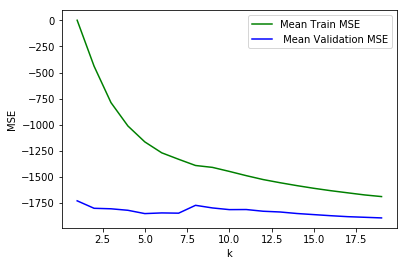

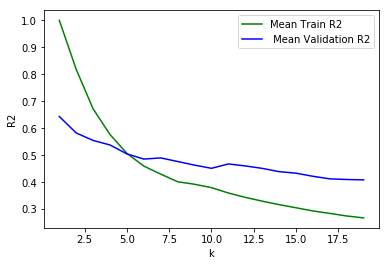

In [19]:
%matplotlib inline

x_axis = range(1,20)
plt.plot(x_axis, grid_search.cv_results_['mean_train_MSE'], c = 'g', label = 'Mean Train MSE')
plt.plot(x_axis, grid_search.cv_results_['mean_test_MSE'], c = 'b', label = ' Mean Validation MSE')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

x_axis = range(1,20)
plt.plot(x_axis, grid_search.cv_results_['mean_train_R2'], c = 'g', label = 'Mean Train R2')
plt.plot(x_axis, grid_search.cv_results_['mean_test_R2'], c = 'b', label = ' Mean Validation R2')
plt.legend()
plt.xlabel('k')
plt.ylabel('R2')
plt.show()

##### Thus, we can see that using K Nearest Neighbors regressor, we can get the best MSE and R2 score when k = 1

In [20]:
# Modelling test data on the best knn model with no. of neighbors = 1
model = KNeighborsRegressor(1)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.5561
Test MSE: 243.7901


### Linear Regression (Ordinary Least Squares)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}

lreg = LinearRegression()
lreg.fit(X_trainval, y_reg_trainval)

cv_result = cross_validate(lreg, X_trainval, y_reg_trainval, cv=kfold, scoring=scoring)

print("Mean Train MSE: {:.4f}".format(np.mean(cv_result['train_MSE'])))
print("Mean Train R2: {:.4f}".format(np.mean(cv_result['train_R2'])))

print("Mean Validation MSE: {:.4f}".format(np.mean(cv_result['test_MSE'])))
print("Mean Validation R2: {:.4f}".format(np.mean(cv_result['test_R2'])))

Mean Train MSE: -102.2738
Mean Train R2: 0.9313
Mean Validation MSE: -1015.9507
Mean Validation R2: 0.4288


c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_MSE'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_R2'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [ ]:
# Modelling test data
model = LinearRegression()
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.8630
Test MSE: 11.1415


### Lasso Regression 

In [59]:
from  sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Lasso(), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\skle

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit='R2', return_train_score=True,
       scoring={'R2': 'r2', 'MSE': 'neg_mean_squared_error'}, verbose=0)

In [60]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'alpha': 1}
Best Mean Train MSE: -133.9901
Best Mean Train R2: 0.9074
Best Mean Validation MSE: -1349.7861
Best Mean Validation R2: 0.4629


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,...,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_train_MSE,split1_train_MSE,split2_train_MSE,split3_train_MSE,split4_train_MSE,mean_train_MSE,std_train_MSE
0,0.086837,0.012898,0.004667,0.005477,0.001,{'alpha': 0.001},0.663018,0.101572,0.353216,0.541298,...,-1010.609452,1611.160614,1,-131.751630,-120.730787,-117.262249,-68.195944,-76.630436,-102.914209,25.499366
1,0.082243,0.017324,0.002114,0.001117,0.01,{'alpha': 0.01},0.665147,0.105611,0.355144,0.534704,...,-1024.387226,1634.850664,2,-132.171658,-121.031289,-117.608873,-68.506655,-76.813813,-103.226458,25.553015
2,0.048013,0.011382,0.003424,0.003560,0.1,{'alpha': 0.1},0.618870,0.142472,0.375112,0.460267,...,-1166.808571,1905.832513,3,-140.249142,-128.430660,-124.452893,-76.180548,-79.761767,-109.815002,26.538730
3,0.015671,0.011776,0.003177,0.001426,1,{'alpha': 1},0.657938,0.252439,0.553566,0.347373,...,-1349.786083,2331.393678,4,-166.328092,-159.850964,-159.019284,-94.769069,-89.983292,-133.990140,34.105362
4,0.016718,0.015584,0.003221,0.001284,10,{'alpha': 10},0.393589,-0.020250,0.035363,0.008591,...,-2061.587969,3535.234443,5,-403.022017,-388.263914,-374.875111,-286.811812,-299.546893,-350.503949,47.814696
5,0.002308,0.002870,0.002827,0.002369,100,{'alpha': 100},-0.126853,-0.163380,-0.044316,-0.009020,...,-2175.309112,3565.090753,6,-2651.261876,-2669.109128,-2638.454276,-388.909166,-2466.912523,-2162.929394,889.984715


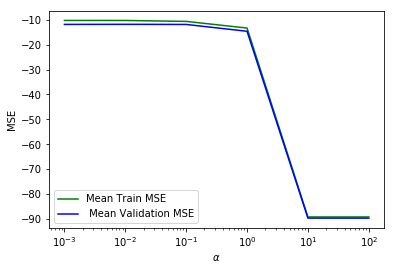

Text(0, 0.5, 'R2')

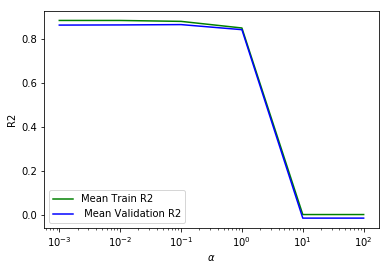

In [ ]:
%matplotlib inline

x_axis = [0.001, 0.01, 0.1, 1, 10, 100]
plt.plot(x_axis, grid_search.cv_results_['mean_train_MSE'], c = 'g', label = 'Mean Train MSE')
plt.plot(x_axis, grid_search.cv_results_['mean_test_MSE'], c = 'b', label = ' Mean Validation MSE')
plt.legend()
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')
plt.show()

x_axis = [0.001, 0.01, 0.1, 1, 10, 100]
plt.plot(x_axis, grid_search.cv_results_['mean_train_R2'], c = 'g', label = 'Mean Train R2')
plt.plot(x_axis, grid_search.cv_results_['mean_test_R2'], c = 'b', label = ' Mean Validation R2')
plt.legend()
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('R2')

In [ ]:
# Modelling test data with Lasso with the best parameter alpha = 0.1
model = Lasso(alpha=0.1)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.8693
Test MSE: 10.6311


### Ridge Regression 

In [61]:
from  sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit='R2', return_train_score=True,
       scoring={'R2': 'r2', 'MSE': 'neg_mean_squared_error'}, verbose=0)

In [62]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'alpha': 1000}
Best Mean Train MSE: -411.7122
Best Mean Train R2: 0.7857
Best Mean Validation MSE: -1635.9847
Best Mean Validation R2: 0.5446


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,...,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_train_MSE,split1_train_MSE,split2_train_MSE,split3_train_MSE,split4_train_MSE,mean_train_MSE,std_train_MSE
0,0.004226,0.006415,0.000406,0.000497,0.001,{'alpha': 0.001},0.652453,0.110087,0.348238,0.537521,...,-1015.638046,1625.529514,3,-130.734280,-120.291728,-116.193257,-67.791059,-76.372241,-102.276513,25.252113
1,0.002866,0.002588,0.002767,0.004592,0.01,{'alpha': 0.01},0.654450,0.107287,0.350677,0.538443,...,-1014.061411,1622.136256,1,-130.858489,-120.349980,-116.363883,-67.819720,-76.434069,-102.365228,25.286742
2,0.003694,0.001344,0.001103,0.000906,0.1,{'alpha': 0.1},0.658523,0.106113,0.351336,0.539368,...,-1014.186462,1618.184886,2,-131.666169,-120.774739,-117.182057,-68.055592,-76.711362,-102.877984,25.498828
3,0.003361,0.004496,0.002175,0.003424,1,{'alpha': 1},0.644204,0.128777,0.348379,0.528231,...,-1042.889720,1656.317508,4,-134.203731,-123.428757,-119.464394,-69.646727,-77.683484,-104.885419,26.067896
4,0.002365,0.004730,0.003082,0.006164,10,{'alpha': 10},0.592505,0.139913,0.374629,0.481450,...,-1127.271807,1828.099205,5,-143.338838,-135.681846,-130.076978,-76.748661,-79.812127,-113.131690,28.782085
5,0.003337,0.005834,0.003132,0.005765,100,{'alpha': 100},0.622968,0.248674,0.531260,0.336124,...,-1363.311239,2375.107117,6,-164.864000,-158.732790,-155.174882,-88.845524,-93.289906,-132.181420,33.741296
6,0.003329,0.006151,0.000208,0.000416,1000,{'alpha': 1000},0.714137,0.532773,0.682199,0.170817,...,-1635.984694,2997.862430,7,-501.137629,-498.422589,-494.774939,-129.004853,-435.220939,-411.712190,143.451122


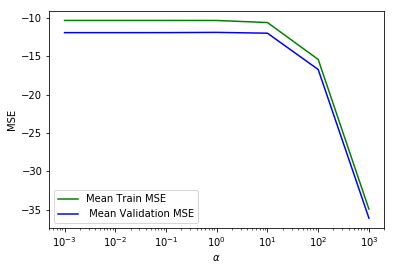

Text(0, 0.5, 'R2')

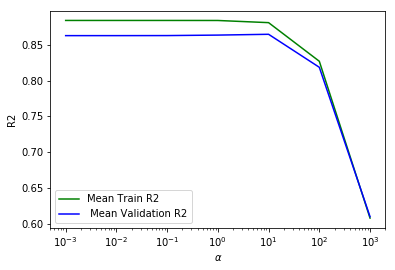

In [ ]:
%matplotlib inline

x_axis = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(x_axis, grid_search.cv_results_['mean_train_MSE'], c = 'g', label = 'Mean Train MSE')
plt.plot(x_axis, grid_search.cv_results_['mean_test_MSE'], c = 'b', label = ' Mean Validation MSE')
plt.legend()
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')
plt.show()

x_axis = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(x_axis, grid_search.cv_results_['mean_train_R2'], c = 'g', label = 'Mean Train R2')
plt.plot(x_axis, grid_search.cv_results_['mean_test_R2'], c = 'b', label = ' Mean Validation R2')
plt.legend()
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('R2')

In [ ]:
# Modelling test data with Ridge with the best parameter alpha = 10
model = Ridge(alpha=10)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

Test R2-score: 0.8733
Test MSE: 10.3058


### Stochastic Gradient Descent Regressor

In [25]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SGDRegressor(random_state= 0, max_iter = 100000, tol=-np.infty,learning_rate = 'optimal'), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='squared_loss', max_iter=100000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=0, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2', 'elasticnet'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit='R2', return_train_score=True,
       scoring={'R2': 'r2', 'MSE': 'neg_mean_squared_error'}, verbose=0)

In [26]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'alpha': 10, 'penalty': 'l2'}
Best Mean Train MSE: -1052.3989
Best Mean Train R2: 0.5040
Best Mean Validation MSE: -1810.3217
Best Mean Validation R2: 0.5217


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_penalty,params,split0_test_R2,split1_test_R2,split2_test_R2,...,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_train_MSE,split1_train_MSE,split2_train_MSE,split3_train_MSE,split4_train_MSE,mean_train_MSE,std_train_MSE
0,9.056656,1.914467,0.000000,0.000000,0.0001,l1,"{'alpha': 0.0001, 'penalty': 'l1'}",-8.000331e+14,-2.555412e+14,-3.033314e+14,...,-3.505153e+18,6.758545e+18,18,-2.461646e+17,-5.893503e+17,-2.623376e+17,-2.210777e+18,-8.886497e+18,-2.439025e+18,3.304237e+18
1,4.200058,0.202919,0.003123,0.006247,0.0001,l2,"{'alpha': 0.0001, 'penalty': 'l2'}",-1.323168e+09,-9.485254e+09,-2.320142e+09,...,-6.404326e+12,1.116041e+13,16,-4.107326e+11,-1.274634e+12,-5.772715e+11,-5.061436e+11,-1.874050e+13,-4.301857e+12,7.225779e+12
2,9.222838,0.577323,0.000000,0.000000,0.0001,elasticnet,"{'alpha': 0.0001, 'penalty': 'elasticnet'}",-5.944213e+09,-2.690790e+09,-8.819002e+10,...,-1.950523e+13,2.812603e+13,17,-1.622853e+12,-8.969669e+11,-2.018665e+13,-5.406964e+11,-4.064845e+13,-1.277912e+13,1.579239e+13
3,9.969624,1.414674,0.000000,0.000000,0.001,l1,"{'alpha': 0.001, 'penalty': 'l1'}",-3.134247e+16,-1.268196e+17,-1.856450e+16,...,-1.835945e+19,1.690053e+19,19,-7.071064e+18,-1.264401e+19,-4.699383e+18,-4.508767e+18,-2.186638e+19,-1.015792e+19,6.549901e+18
4,6.564091,0.959269,0.000000,0.000000,0.001,l2,"{'alpha': 0.001, 'penalty': 'l2'}",-1.105596e+08,-2.610040e+08,-1.509861e+08,...,-5.452073e+10,4.238783e+10,12,-2.868987e+10,-3.429901e+10,-3.752670e+10,-1.249169e+10,-4.729570e+10,-3.206059e+10,1.150044e+10
5,9.597273,1.238565,0.000406,0.000812,0.001,elasticnet,"{'alpha': 0.001, 'penalty': 'elasticnet'}",-2.260822e+09,-1.047640e+09,-2.756530e+09,...,-1.746854e+12,2.798359e+12,15,-5.146888e+11,-1.637712e+11,-7.274721e+11,-9.157142e+10,-1.063301e+12,-5.121609e+11,3.601088e+11
6,8.956051,0.773774,0.000000,0.000000,0.01,l1,"{'alpha': 0.01, 'penalty': 'l1'}",-3.830937e+17,-5.008826e+16,-5.061885e+16,...,-8.424321e+19,1.213420e+20,20,-7.051777e+19,-5.327435e+18,-9.493938e+18,-4.934080e+18,-3.586225e+19,-2.522709e+19,2.537592e+19
7,3.799108,0.130094,0.000000,0.000000,0.01,l2,"{'alpha': 0.01, 'penalty': 'l2'}",-6.597967e+07,-6.277420e+07,-4.467846e+07,...,-1.624932e+10,1.083496e+10,11,-1.307203e+10,-8.403145e+09,-9.536256e+09,-1.306639e+10,-4.127873e+09,-9.641140e+09,3.329959e+09
8,8.199878,0.774171,0.000000,0.000000,0.01,elasticnet,"{'alpha': 0.01, 'penalty': 'elasticnet'}",-7.934656e+07,-7.324969e+08,-1.430357e+09,...,-5.580119e+11,8.539630e+11,14,-1.387342e+10,-8.321703e+10,-3.137018e+11,-5.746789e+10,-2.386098e+11,-1.413740e+11,1.147437e+11
9,7.329535,0.131978,0.000000,0.000000,0.1,l1,"{'alpha': 0.1, 'penalty': 'l1'}",-2.124870e+17,-1.295291e+18,-5.872059e+17,...,-1.636840e+20,1.106791e+20,21,-1.436679e+20,-1.505895e+20,-1.263865e+20,-4.869484e+19,-1.367621e+19,-9.660298e+19,5.511577e+19


In [ ]:
# Modelling test data with SGDRegressor with the best parameter alpha = 0.01 and penalty = l2 
model = SGDRegressor(alpha = 0.01, penalty = 'l2')
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

### Linear Support Vector Regressor

In [27]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'C' : [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LinearSVR(max_iter = 100000), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packa

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=100000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit='R2', return_train_score=True,
       scoring={'R2': 'r2', 'MSE': 'neg_mean_squared_error'}, verbose=0)

In [26]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'C': 100}
Best Mean Train MSE: -794.7863
Best Mean Train R2: 0.6560
Best Mean Validation MSE: -1245.2013
Best Mean Validation R2: 0.6858


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,...,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_train_MSE,split1_train_MSE,split2_train_MSE,split3_train_MSE,split4_train_MSE,mean_train_MSE,std_train_MSE
0,0.004382,0.001300,0.001011,0.000851,0.01,{'C': 0.01},0.318257,0.280369,0.195814,0.030573,...,-2047.105311,3447.397155,5,-2443.228643,-2459.726092,-2425.510690,-318.456457,-2306.316717,-1990.647720,837.835348
1,0.009702,0.007529,0.003896,0.003729,0.1,{'C': 0.1},0.956510,0.817143,0.526358,0.322125,...,-1363.156651,2440.880628,4,-1689.137469,-1641.267865,-1653.859006,-145.114013,-1565.826958,-1339.041062,598.316390
2,0.054617,0.031590,0.000544,0.000772,1,{'C': 1},0.953265,0.849174,0.543542,0.344368,...,-1320.346159,2360.147701,3,-1442.642718,-1361.877124,-1303.723045,-120.546987,-1269.549376,-1099.667850,493.064171
3,0.482164,0.284276,0.003813,0.006155,10,{'C': 10},0.951035,0.795838,0.573062,0.371009,...,-1286.471940,2256.809034,2,-910.249260,-1206.060863,-787.532890,-88.913616,-1104.595421,-819.470410,393.375771
4,5.199929,2.071139,0.000399,0.000798,100,{'C': 100},0.957349,0.803997,0.628883,0.371254,...,-1245.201344,2271.859166,1,-944.475375,-1126.480846,-847.544074,-88.896595,-966.534749,-794.786328,364.139885


In [ ]:
%matplotlib inline

x_axis = [0.01, 0.1, 1, 10, 100]
plt.plot(x_axis, grid_search.cv_results_['mean_train_MSE'], c = 'g', label = 'Mean Train MSE')
plt.plot(x_axis, grid_search.cv_results_['mean_test_MSE'], c = 'b', label = ' Mean Validation MSE')
plt.legend()
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('MSE')
plt.show()

x_axis = [0.01, 0.1, 1, 10, 100]
plt.plot(x_axis, grid_search.cv_results_['mean_train_R2'], c = 'g', label = 'Mean Train R2')
plt.plot(x_axis, grid_search.cv_results_['mean_test_R2'], c = 'b', label = ' Mean Validation R2')
plt.legend()
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('MSE')

In [ ]:
# Modelling test data with Linear Support Vector Regressor with the best parameter C = 1
model = LinearSVR(max_iter = 100000, C=1)
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

### Kernelized Support Vector Regression

In [28]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}
param_grid = {'C' : [0.01, 0.1, 1, 10], 
              'gamma' : [0.01, 0.1, 1, 10],
              'kernel' : ['rbf', 'linear']}

grid_search = GridSearchCV(SVR(), param_grid, cv=kfold, return_train_score=True, scoring=scoring, refit='R2')
grid_search.fit(X_trainval, y_reg_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit='R2', return_train_score=True,
       scoring={'R2': 'r2', 'MSE': 'neg_mean_squared_error'}, verbose=0)

In [24]:
print("Best parameters: {}".format(grid_search.best_params_))

print("Best Mean Train MSE: {:.4f}".format(grid_search.cv_results_['mean_train_MSE'][grid_search.best_index_]))
print("Best Mean Train R2: {:.4f}".format(grid_search.cv_results_['mean_train_R2'][grid_search.best_index_]))
print("Best Mean Validation MSE: {:.4f}".format(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print("Best Mean Validation R2: {:.4f}".format(grid_search.cv_results_['mean_test_R2'][grid_search.best_index_]))

Best parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best Mean Train MSE: -1307.3916
Best Mean Train R2: 0.4413
Best Mean Validation MSE: -1348.4878
Best Mean Validation R2: 0.6594


In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

In [ ]:
# Modelling test data with Support Vector Regressor with the best parameter C = 10, gamma=0.1 and kernel = rbf
model = SVR(C = 10, gamma=0.1, kernel = 'rbf')
model.fit(X_trainval, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, model.predict(X_test))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, model.predict(X_test))))

### Polynomial Regression

In [ ]:
from sklearn.preprocessing  import PolynomialFeatures

train_MSE_list = []
test_MSE_list = []
train_R2_list = []
test_R2_list = []

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error'}

lreg = LinearRegression()

for degree in range(1,7):
    poly = PolynomialFeatures(degree)
    X_trainval_poly = poly.fit_transform(X_trainval)
    X_test_poly = poly.fit_transform(X_test)
    lreg.fit(X_trainval_poly, y_reg_trainval)
    train_MSE_list.append(mean_squared_error(y_reg_trainval, lreg.predict(X_trainval_poly)))
    test_MSE_list.append(mean_squared_error(y_reg_test, lreg.predict(X_test_poly)))
    train_R2_list.append(r2_score(y_reg_trainval, lreg.predict(X_trainval_poly)))
    test_R2_list.append(r2_score(y_reg_test, lreg.predict(X_test_poly)))

In [ ]:
%matplotlib inline

x_axis = range(1,7)
plt.plot(x_axis, train_MSE_list, c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, test_MSE_list, c = 'b', label = ' Mean Test Score')
plt.legend()
plt.xlabel('Degree of the polynomial')
plt.ylabel('MSE')
plt.show()

x_axis = range(1,7)
plt.plot(x_axis, train_R2_list, c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, test_R2_list, c = 'b', label = ' Mean Test Score')
plt.legend()
plt.xlabel('Degree of the polynomial')
plt.ylabel('R2')
plt.yscale('log')

###### It can be clearly seen that we get the best R2 and MSE for both training and test when degree = 2

In [ ]:
# Modelling test data with polynomial regression of degree 2
poly = PolynomialFeatures(2)
X_trainval_poly = poly.fit_transform(X_trainval)
X_test_poly = poly.fit_transform(X_test)
lreg.fit(X_trainval_poly, y_reg_trainval)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Test R2-score: {:.4f}".format(r2_score(y_reg_test, lreg.predict(X_test_poly))))
print("Test MSE: {:.4f}".format(mean_squared_error(y_reg_test, lreg.predict(X_test_poly))))

## Classification

### Splitting the data into training-validation and test data sets

In [10]:
X = merged_audit_risk_data.loc[:, ~merged_audit_risk_data.columns.isin(['Audit_Risk', 'Risk'])]
y = merged_audit_risk_data.loc[:, merged_audit_risk_data.columns.isin(['Audit_Risk', 'Risk'])]

from sklearn.model_selection import train_test_split

X_trainval_org, X_test_org, y_trainval, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

# We have two output variables Audit_Risk and Risk
# Assessing Audit_Risk is a regression problem whereas assessing Risk is a binary classification problem
y_reg_trainval = y_trainval['Audit_Risk']
y_reg_test = y_test['Audit_Risk']

y_cls_trainval = y_trainval['Risk'].astype(np.int64)
y_cls_test = y_test['Risk'].astype(np.int64)

In [16]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

### Scaling the training-validation and test data sets using MinMax Scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_trainval = scaler.fit_transform(X_trainval_org)
X_test = scaler.fit_transform(X_test_org)

c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Feature Selection: Principal Component Analysis (PCA)
Now, we shall perform Principal Component Analysis, and determine what would be the ideal number of Prinicipal Components that would explain most of the variation in the data to deal with the high correlation between different features in the dataset

from sklearn.decomposition import PCA

pca = PCA().fit(X_trainval)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Audit Risk Training-Validation Dataset Explained Variance')
plt.show()

from sklearn.decomposition import PCA

pca = PCA().fit(X_test)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Audit Risk Test Dataset Explained Variance')
plt.show()

#### As we can see, selecting about 12 principal components can explain about 99 % variance in both the training-validation and test data sets.
#### Therefore, we select 12 as the no. of PCA components

pca = PCA(n_components = 12)
column_names = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']
X_trainval = pd.DataFrame(pca.fit_transform(X_trainval), columns = column_names)
X_test = pd.DataFrame(pca.fit_transform(X_test), columns = column_names)

X_trainval.head()

### Evaluation Strategy

##### The objective of this classification is to find companies that are risky and needs to be targeted for auditing.
##### So, correctly classifying the relevant class (Risk = 1) is very important, but at the same time, we would not really like many instances wherein the company was not risky (Risk = 0) but was targeted for auditing, as it will require time and money.
##### We require a classifier which is precise (how many instances it classifies correctly), but at the same time robust (it does not miss a significant number of instances).
##### Therefore, we will assess the models based on their 'F-1 Score' which tells which model has both the best precision and recall.

### K Nearest Neighbors Classification

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 20)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_trainval, y_cls_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='f1', verbose=0)

In [18]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best Mean Train F1-score: {:.4f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best Mean Validation F1-score: {:.4f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'n_neighbors': 1}
Best Mean Train F1-score: 1.0000
Best Mean Validation F1-score: 0.9956


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001220,0.001494,0.015490,2.485005e-03,1,{'n_neighbors': 1},0.987952,1.0,1.000000,1.0,...,0.995649,0.005380,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003840,0.006696,0.006962,8.527822e-03,2,{'n_neighbors': 2},0.987952,1.0,1.000000,1.0,...,0.995649,0.005380,1,0.997494,0.994764,0.994898,0.994681,0.997361,0.995840,0.001299
2,0.002146,0.004292,0.007446,7.977157e-03,3,{'n_neighbors': 3},0.987952,1.0,1.000000,1.0,...,0.995649,0.005380,1,0.997494,0.994764,0.994898,0.994681,0.997361,0.995840,0.001299
3,0.004742,0.006365,0.010416,4.354716e-03,4,{'n_neighbors': 4},0.987952,1.0,1.000000,1.0,...,0.995649,0.005380,1,0.997494,0.994764,0.994898,0.994681,0.997361,0.995840,0.001299
4,0.001047,0.000949,0.008335,7.224706e-03,5,{'n_neighbors': 5},0.987952,1.0,1.000000,1.0,...,0.995649,0.005380,1,0.997494,0.994764,0.994898,0.994681,0.997361,0.995840,0.001299
5,0.000352,0.000704,0.016093,3.777915e-03,6,{'n_neighbors': 6},0.987952,1.0,1.000000,1.0,...,0.995649,0.005380,1,0.997494,0.994764,0.994898,0.994681,0.997361,0.995840,0.001299
6,0.003333,0.006666,0.010012,8.174869e-03,7,{'n_neighbors': 7},0.987952,1.0,1.000000,1.0,...,0.995649,0.005380,1,0.997494,0.994764,0.994898,0.994681,0.997361,0.995840,0.001299
7,0.000000,0.000000,0.016954,3.205764e-04,8,{'n_neighbors': 8},0.987952,1.0,1.000000,1.0,...,0.995649,0.005380,1,0.997494,0.994764,0.994898,0.994681,0.997361,0.995840,0.001299
8,0.004838,0.005774,0.012783,7.672556e-03,9,{'n_neighbors': 9},0.987952,1.0,1.000000,1.0,...,0.995649,0.005380,1,0.997494,0.994764,0.994898,0.994681,0.997361,0.995840,0.001299
9,0.003557,0.005051,0.014566,6.832887e-03,10,{'n_neighbors': 10},0.987952,1.0,1.000000,1.0,...,0.995649,0.005380,1,0.997494,0.994764,0.994898,0.994681,0.997361,0.995840,0.001299


Text(0, 0.5, 'F1-score')

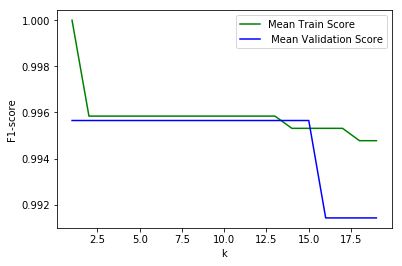

In [19]:
%matplotlib inline

x_axis = range(1,20)
plt.plot(x_axis, grid_search.cv_results_['mean_train_score'], c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, grid_search.cv_results_['mean_test_score'], c = 'b', label = ' Mean Validation Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('F1-score')

It can be confirmed graphically as well that at k = 1, we have the best mean validation recall.

In [20]:
knn = KNeighborsClassifier(1)
knn.fit(X_trainval, y_cls_trainval)

from sklearn.metrics import classification_report
print(classification_report(y_cls_test, knn.predict(X_test)))
print('Accuracy: {:.4f}'.format(knn.score(X_test, y_cls_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        65

   micro avg       1.00      1.00      1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

Accuracy: 1.0000


# Plotting the separation of classes in the test dataset using the best parameters
from mlxtend.plotting import plot_decision_regions

X_b = X_test.values[:, [0,9]]
y_b = y_cls_test.values[:].astype(np.int64)

knn.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = knn)

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_trainval, y_cls_trainval)

c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanik\app

c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\si

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [22]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best Mean Train F1-score: {:.4f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best Mean Validation F1-score: {:.4f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'C': 0.001, 'penalty': 'l2'}
Best Mean Train F1-score: 1.0000
Best Mean Validation F1-score: 1.0000


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005834,0.005396,0.001011,0.000907,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.000000,0.000000,0.000000,...,0.000000,0.000000,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.003421,0.004955,0.003934,0.005920,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",1.000000,1.000000,1.000000,...,1.000000,0.000000,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.001443,0.001810,0.002030,0.002656,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.000000,0.000000,0.000000,...,0.000000,0.000000,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.002516,0.003158,0.000414,0.000507,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.975610,0.979592,0.988764,...,0.980948,0.007690,11,0.987342,0.984127,0.981912,0.978378,0.983957,0.983143,0.002949
4,0.003648,0.007296,0.000199,0.000399,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.936709,0.979592,0.965517,...,0.962538,0.014441,12,0.969072,0.976000,0.976623,0.975610,0.989362,0.977333,0.006606
5,0.003099,0.003066,0.003390,0.002938,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.975610,1.000000,1.000000,...,0.989181,0.013356,9,0.992443,0.986807,0.987147,0.986595,0.994709,0.989540,0.003377
6,0.001645,0.002027,0.005520,0.005818,1,l1,"{'C': 1, 'penalty': 'l1'}",0.987952,1.000000,1.000000,...,0.991650,0.011652,6,0.997494,0.994764,0.994898,0.994681,0.994709,0.995309,0.001095
7,0.002844,0.005203,0.003262,0.006021,1,l2,"{'C': 1, 'penalty': 'l2'}",0.975610,1.000000,1.000000,...,0.989181,0.013356,9,0.997494,0.997389,0.994898,0.994681,0.997361,0.996365,0.001289
8,0.000210,0.000419,0.002876,0.005751,10,l1,"{'C': 10, 'penalty': 'l1'}",0.987952,1.000000,1.000000,...,0.991650,0.011652,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.006218,0.007616,0.003334,0.006164,10,l2,"{'C': 10, 'penalty': 'l2'}",0.987952,1.000000,1.000000,...,0.991650,0.011652,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


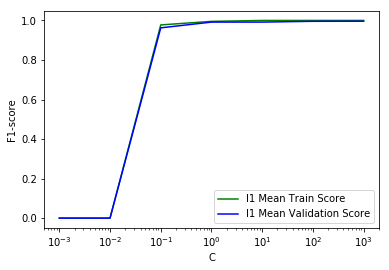

Text(0, 0.5, 'F1-score')

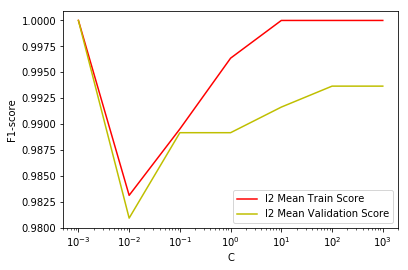

In [23]:
%matplotlib inline

x_axis = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(x_axis, results.loc[results['param_penalty'] == 'l1', 'mean_train_score'], c = 'g', label = 'l1 Mean Train Score')
plt.plot(x_axis, results.loc[results['param_penalty'] == 'l1', 'mean_test_score'], c = 'b', label = 'l1 Mean Validation Score')
plt.legend()
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('F1-score')
plt.show()

x_axis = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(x_axis, results.loc[results['param_penalty'] == 'l2', 'mean_train_score'], c = 'r', label = 'l2 Mean Train Score')
plt.plot(x_axis, results.loc[results['param_penalty'] == 'l2', 'mean_test_score'], c = 'y', label = 'l2 Mean Validation Score')
plt.legend()
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('F1-score')

As we can see the best fit for logistic regression is when we use l1 regularization with value of C being 10

In [24]:
lreg = LogisticRegression(penalty = 'l1', C = 10)
lreg.fit(X_trainval, y_cls_trainval)

from sklearn.metrics import classification_report
print(classification_report(y_cls_test, lreg.predict(X_test)))
print('Accuracy: {:.4f}'.format(lreg.score(X_test, y_cls_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        65

   micro avg       1.00      1.00      1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

Accuracy: 1.0000


c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Plotting the separation of classes in the test dataset using the best parameters
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

X_b = X_test.values[:, [0,9]]
y_b = y_cls_test.values[:].astype(np.int64)

lreg.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = lreg)

### Linear Support Vector Machine

In [27]:
from sklearn.svm import LinearSVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(LinearSVC(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_trainval, y_cls_trainval)
train_score_array = []
test_score_array = []

c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packa

In [28]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best Mean Train F1-score: {:.4f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best Mean Validation F1-score: {:.4f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'C': 1}
Best Mean Train F1-score: 1.0000
Best Mean Validation F1-score: 0.9956


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003024,0.000630,0.002194,0.000399,0.001,{'C': 0.001},0.975610,0.979592,0.988764,0.990476,...,0.980948,0.007690,7,0.987342,0.984127,0.981912,0.978378,0.983957,0.983143,0.002949
1,0.003159,0.000423,0.002214,0.000395,0.01,{'C': 0.01},0.975610,1.000000,1.000000,1.000000,...,0.989181,0.013356,6,0.992443,0.986807,0.987147,0.986595,0.994709,0.989540,0.003377
2,0.003792,0.001371,0.001844,0.000718,0.1,{'C': 0.1},0.987952,1.000000,1.000000,1.000000,...,0.991650,0.011652,5,1.000000,0.997389,0.997455,0.997347,0.997361,0.997911,0.001045
3,0.003723,0.000384,0.001910,0.000939,1,{'C': 1},0.987952,1.000000,1.000000,1.000000,...,0.995649,0.005380,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.007996,0.001630,0.001994,0.000631,10,{'C': 10},0.987952,1.000000,1.000000,1.000000,...,0.995649,0.005380,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.014480,0.007547,0.006665,0.006976,100,{'C': 100},0.987952,1.000000,1.000000,1.000000,...,0.995649,0.005380,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.017011,0.000270,0.000000,0.000000,1000,{'C': 1000},0.987952,1.000000,1.000000,1.000000,...,0.995649,0.005380,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


Text(0, 0.5, 'F1-score')

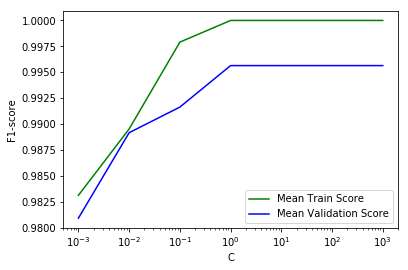

In [29]:
%matplotlib inline

x_axis = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.plot(x_axis, results['mean_train_score'], c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, results['mean_test_score'], c = 'b', label = 'Mean Validation Score')
plt.legend()
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('F1-score')

We can see that the best fit for Linear SVC is obtained at C = 1

In [30]:
lsvc = LinearSVC(C = 1)
lsvc.fit(X_trainval,y_cls_trainval)

from sklearn.metrics import classification_report
print(classification_report(y_cls_test, lsvc.predict(X_test)))
print('Accuracy: {:.4f}'.format(lsvc.score(X_test, y_cls_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        65

   micro avg       1.00      1.00      1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

Accuracy: 1.0000


In [31]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

X_b = X_test.values[:, [0,9]]
y_b = y_cls_test.values[:].astype(np.int64)

lsvc.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = lsvc)

ModuleNotFoundError: No module named 'mlxtend'

### Kernelized Support Vector Machine

In [36]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'kernel': ['linear', 'rbf', 'poly']}

grid_search = GridSearchCV(SVC(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_trainval, y_cls_trainval)

c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predict

c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predict

c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predict

c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predict

c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predict

c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanik\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predict

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [37]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best Mean Train F1-score: {:.4f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best Mean Validation F1-score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Best Mean Train F1-score: 1.0000
Best Mean Validation F1-score: 1.0000


In [38]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015550,0.002351,0.002141,0.001385,0.001,0.001,linear,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",0.645161,0.076923,...,0.165845,0.243354,117,0.757764,0.040816,0.096618,0.010526,0.041237,0.189392,0.285542
1,0.017721,0.004652,0.006979,0.007443,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.645161,0.000000,...,0.129032,0.258065,129,0.769231,0.000000,0.000000,0.000000,0.000000,0.153846,0.307692
2,0.016958,0.001422,0.001370,0.002741,0.001,0.001,poly,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}",0.173913,0.000000,...,0.034783,0.069565,134,0.319328,0.000000,0.000000,0.000000,0.000000,0.063866,0.127731
3,0.014456,0.007524,0.004042,0.006478,0.001,0.01,linear,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}",0.645161,0.076923,...,0.165845,0.243354,117,0.757764,0.040816,0.096618,0.010526,0.041237,0.189392,0.285542
4,0.020723,0.002897,0.004332,0.003067,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.645161,0.000000,...,0.129032,0.258065,129,0.773006,0.000000,0.000000,0.000000,0.000000,0.154601,0.309202
5,0.016218,0.008130,0.006032,0.006150,0.001,0.01,poly,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}",0.173913,0.000000,...,0.034783,0.069565,134,0.319328,0.000000,0.000000,0.000000,0.000000,0.063866,0.127731
6,0.017570,0.002951,0.000809,0.001618,0.001,0.1,linear,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}",0.645161,0.076923,...,0.165845,0.243354,117,0.757764,0.040816,0.096618,0.010526,0.041237,0.189392,0.285542
7,0.028402,0.008033,0.004115,0.003649,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.816901,0.000000,...,0.163380,0.326761,124,0.866856,0.000000,0.000000,0.000000,0.000000,0.173371,0.346742
8,0.021177,0.007064,0.004500,0.002665,0.001,0.1,poly,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'poly'}",0.173913,0.000000,...,0.034783,0.069565,134,0.319328,0.000000,0.000000,0.000000,0.000000,0.063866,0.127731
9,0.020242,0.003948,0.005813,0.001669,0.001,1,linear,"{'C': 0.001, 'gamma': 1, 'kernel': 'linear'}",0.645161,0.076923,...,0.165845,0.243354,117,0.757764,0.040816,0.096618,0.010526,0.041237,0.189392,0.285542


We can see the best fit is obtained with an rbf kernel with C = 0.1 and Gamma = 10

In [39]:
ksvc_rbf = SVC(kernel = 'rbf', C = 0.1, gamma = 10)
ksvc_rbf.fit(X_trainval,y_cls_trainval)

from sklearn.metrics import classification_report
print(classification_report(y_cls_test, ksvc_rbf.predict(X_test)))
print('Accuracy: {:.4f}'.format(ksvc_rbf.score(X_test, y_cls_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.98      1.00      0.99        65

   micro avg       0.99      0.99      0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125

Accuracy: 0.9920


In [ ]:
# Plotting the separation of classes in the test dataset using the best parameters
%matplotlib inline

X_b = X_test.values[:, [0,9]]
y_b = y_cls_test.values[:].astype(np.int64)

ksvc_rbf.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = ksvc_rbf)

### Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': range(1, 10)}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_train_r, y_regr_train)

NameError: name 'X_train_r' is not defined

In [41]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best Mean Train F1-score: {:.4f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best Mean Validation F1-score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 1}
Best Mean Train F1-score: 1.0000
Best Mean Validation F1-score: 0.9976


Text(0, 0.5, 'F1-score')

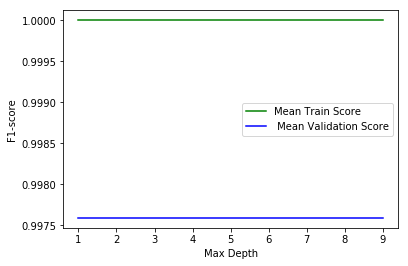

In [42]:
%matplotlib inline

x_axis = range(1,10)
plt.plot(x_axis, grid_search.cv_results_['mean_train_score'], c = 'g', label = 'Mean Train Score')
plt.plot(x_axis, grid_search.cv_results_['mean_test_score'], c = 'b', label = ' Mean Validation Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('F1-score')

We can see that the best fit is obtained with max depth = 2

In [43]:
dtree = DecisionTreeClassifier(random_state = 0, max_depth = 2)
dtree.fit(X_train_r, y_regr_train)

print(classification_report(y_cls_test, dtree.predict(X_test_r)))
print('Accuracy: {:.4f}'.format(dtree.score(X_test_r, y_regr_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        65

   micro avg       1.00      1.00      1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

Accuracy: 1.0000


In [ ]:
%matplotlib inline

X_b = X_test.values[:, [0,9]]
y_b = y_cls_test.values[:].astype(np.int64)

dtree.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = dtree)

### Conclusion

#### Regression

Out of all the models, Support Vector Regressor( C= 10, gamma=0.1, kernel = rbf) gave the best metrics for both validation and test:

###### 1. Validation
Mean Validation MSE: 12.5945
, Mean Validation R2: 0.8785

###### 2. Test
Test R2-score: 0.9249
, Test MSE: 6.1079

#### Classification

Almost all models perform fairly well on the classification task.

K Nearest Neighbors Classifier (n_neighbors = 1) performs the best with the highest metrics for both validation and test:

###### 1. Validation
Mean Validation F1-score: 0.9956

###### 2. Test
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        65

Accuracy: 1.0000    
    
However, the decision boundary is not smooth as the model is complex

Therefore, we choose Logistic Regression with almost similar metrics for both validation and test but the decision boundary is smoother

###### 1. Validation
Mean Validation F1-score: 0.9937
    
###### 2. Test  
        precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.98      0.99        65

Accuracy: 0.9920
